In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('beer_profile_and_ratings.csv')
df.head()

Name    Style  \
0                         Amber  Altbier   
1                    Double Bag  Altbier   
2                Long Trail Ale  Altbier   
3                  Doppelsticke  Altbier   
4  Sleigh'r Dark Doüble Alt Ale  Altbier   

                                            Brewery  \
0                               Alaskan Brewing Co.   
1                            Long Trail Brewing Co.   
2                            Long Trail Brewing Co.   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
4                           Ninkasi Brewing Company   

                                    Beer Name (Full)  \
0                  Alaskan Brewing Co. Alaskan Amber   
1                  Long Trail Brewing Co. Double Bag   
2              Long Trail Brewing Co. Long Trail Ale   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4  Ninkasi Brewing Company Sleigh'r Dark Doüble A...   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   
2  Notes:Long Trail Ale is a full-bodied amber al...  5.0       25       50   
3                                             Notes:  8.5       25       50   
4  Notes:Called 'Dark Double Alt' on the label.Se...  7.2       25       50   

   Astringency  Body  ...  Fruits  Hoppy  Spices  Malty  review_aroma  \
0           13    32  ...      33     57       8    111      3.498994   
1           12    57  ...      24     35      12     84      3.798337   
2           14    37  ...      10     54       4     62      3.409814   
3           13    55  ...      49     40      16    119      4.148098   
4           25    51  ...      11     51      20     95      3.625000   

   review_appearance  review_palate  review_taste  review_overall  \
0           3.636821       3.556338      3.643863        3.847082   
1           3.846154       3.904366      4.024948        4.034304   
2           3.667109       3.600796      3.631300        3.830239   
3           4.033967       4.150815      4.205163        4.005435   
4           3.973958       3.734375      3.765625        3.817708   

   number_of_reviews  
0                497  
1                481  
2                377  
3                368  
4                 96  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [4]:
df.describe()

ABV      Min IBU      Max IBU  Astringency         Body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           Alcohol       Bitter        Sweet         Sour        Salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000    17.000000    33.000000    11.000000     0.000000   
50%      11.000000    31.000000    54.000000    22.000000     0.000000   
75%      22.000000    52.000000    77.000000    42.000000     1.000000   
max     139.000000   150.000000   263.000000   284.000000    48.000000   

            Fruits        Hoppy       Spices        Malty  review_aroma  \
count  3197.000000  3197.000000  3197.000000  3197.000000   3197.000000   
mean     38.529559    40.924617    18.345637    75.330935      3.638789   
std      32.296646    30.403641    23.756582    39.909338      0.503209   
min       0.000000     0.000000     0.000000     0.000000      1.509615   
25%      12.000000    18.000000     4.000000    45.000000      3.422559   
50%      29.000000    33.000000    10.000000    73.000000      3.720183   
75%      60.000000    56.000000    23.000000   103.000000      3.978000   
max     175.000000   172.000000   184.000000   239.000000      5.000000   

       review_appearance  review_palate  review_taste  review_overall  \
count        3197.000000    3197.000000   3197.000000     3197.000000   
mean            3.754393       3.660428      3.702496        3.747522   
std             0.403416       0.449937      0.510361        0.444288   
min             1.571429       1.285714      1.214286        1.136364   
25%             3.604651       3.470021      3.500000        3.566667   
50%             3.833333       3.741667      3.791667        3.830239   
75%             4.000000       3.965587      4.033333        4.032847   
max             4.666667       5.000000      5.000000        5.000000   

       number_of_reviews  
count        3197.000000  
mean          233.284955  
std           361.811847  
min             1.000000  
25%            23.000000  
50%            93.000000  
75%           284.000000  
max          3290.000000

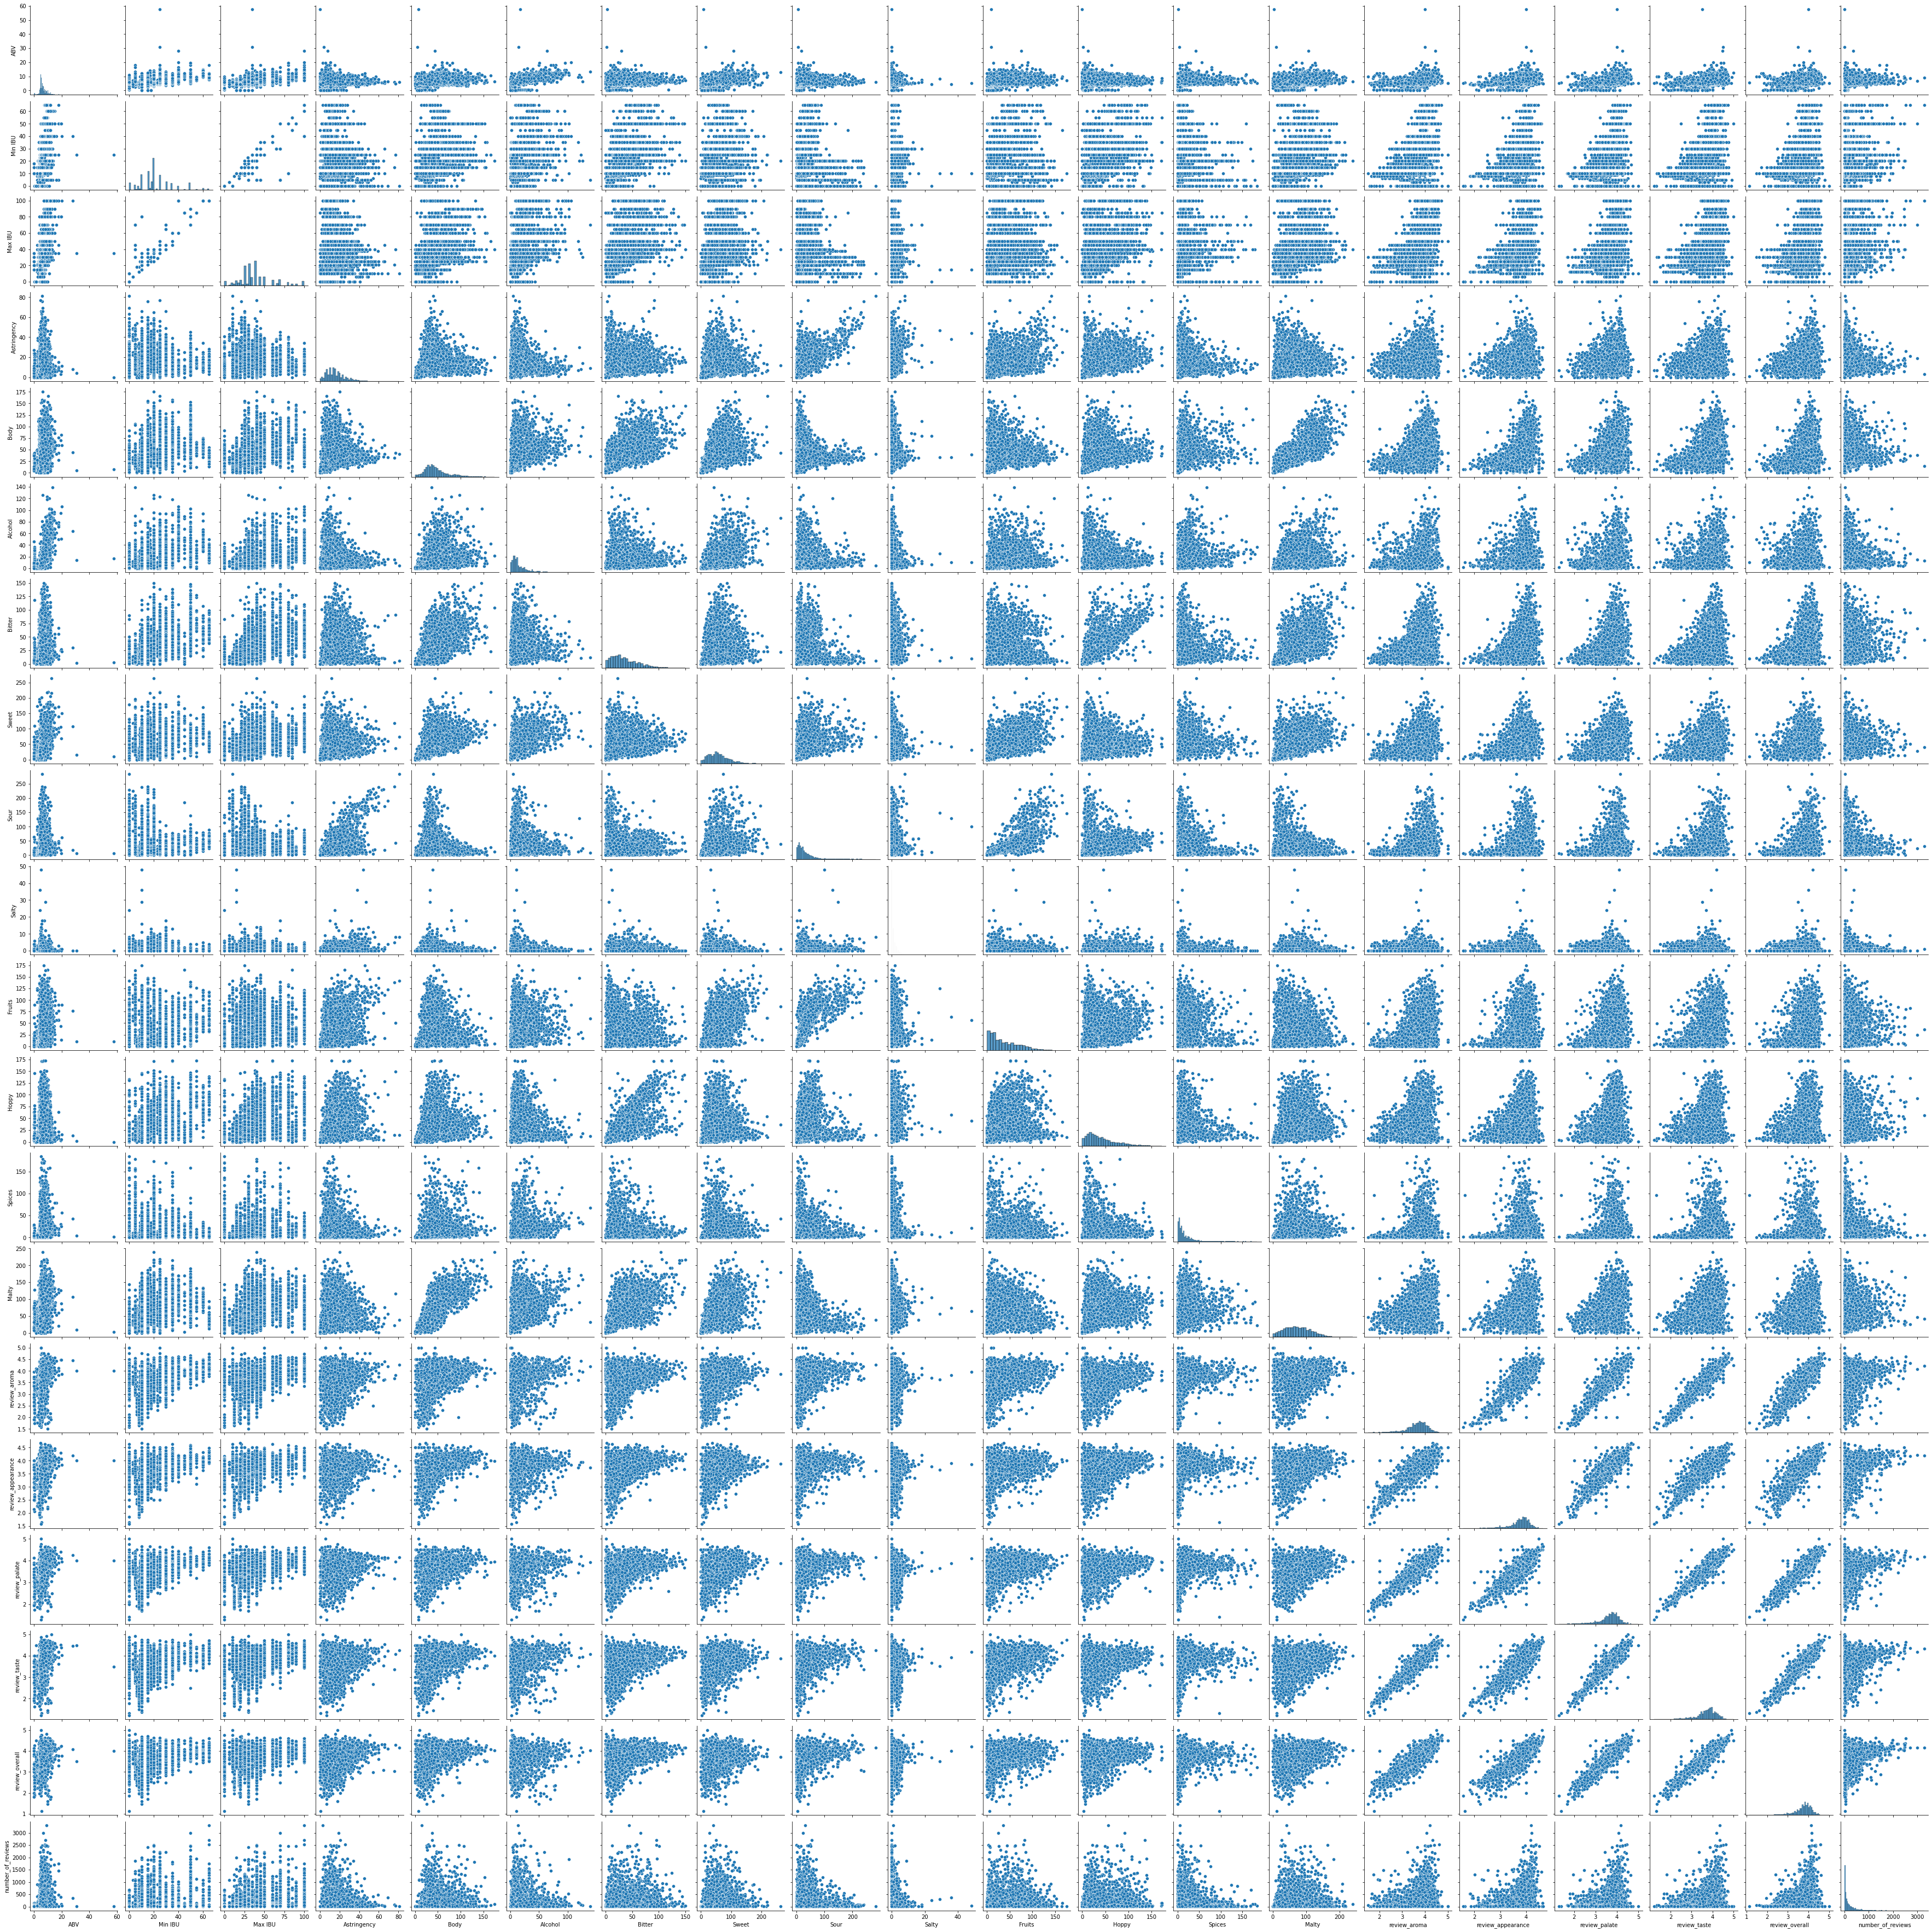

In [5]:
## Assess correlations visually:
sns.pairplot(df)

<AxesSubplot:xlabel='Sour', ylabel='Astringency'>

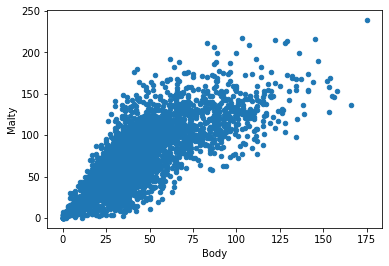

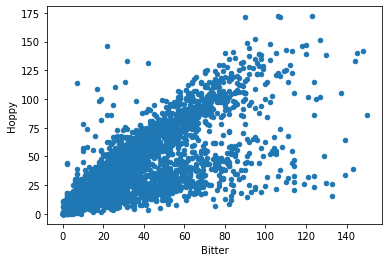

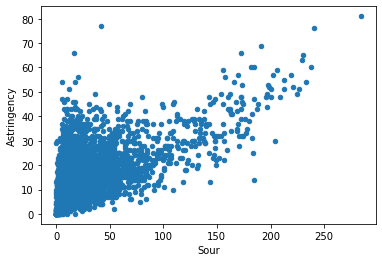

In [6]:
# I think all of the review types are averaged into 'review_overall' rating, so I tried to spot other (not as intuitive) correlations.
df.plot.scatter(x='Body',y='Malty')
df.plot.scatter(x='Bitter', y='Hoppy')
df.plot.scatter(x='Sour', y='Astringency')

In [7]:
##Check for correlations numerically:
df.corr()

ABV   Min IBU   Max IBU  Astringency      Body  \
ABV                1.000000  0.432005  0.501037    -0.169521  0.241673   
Min IBU            0.432005  1.000000  0.854248    -0.071501  0.325338   
Max IBU            0.501037  0.854248  1.000000    -0.120273  0.310617   
Astringency       -0.169521 -0.071501 -0.120273     1.000000 -0.059540   
Body               0.241673  0.325338  0.310617    -0.059540  1.000000   
Alcohol            0.654908  0.323694  0.392811    -0.171987  0.268885   
Bitter             0.067388  0.539452  0.478080     0.114686  0.542236   
Sweet              0.463487  0.227139  0.277292    -0.021456  0.458842   
Sour               0.100795 -0.073098 -0.043275     0.571030 -0.126733   
Salty             -0.120089 -0.057512 -0.083214     0.347155 -0.099277   
Fruits             0.291001  0.066335  0.172929     0.345232 -0.048155   
Hoppy             -0.052596  0.407475  0.345168     0.330951  0.070138   
Spices             0.191468 -0.046152  0.044533    -0.083795  0.185123   
Malty              0.162060  0.300041  0.288219    -0.082085  0.754228   
review_aroma       0.416197  0.343730  0.369456     0.068579  0.360234   
review_appearance  0.349139  0.380908  0.379655     0.070948  0.421331   
review_palate      0.392517  0.352723  0.355608     0.106950  0.345270   
review_taste       0.381200  0.339885  0.346557     0.092021  0.365055   
review_overall     0.251838  0.289972  0.271969     0.159788  0.313824   
number_of_reviews  0.142176  0.219822  0.221572    -0.050062  0.039057   

                    Alcohol    Bitter     Sweet      Sour     Salty    Fruits  \
ABV                0.654908  0.067388  0.463487  0.100795 -0.120089  0.291001   
Min IBU            0.323694  0.539452  0.227139 -0.073098 -0.057512  0.066335   
Max IBU            0.392811  0.478080  0.277292 -0.043275 -0.083214  0.172929   
Astringency       -0.171987  0.114686 -0.021456  0.571030  0.347155  0.345232   
Body               0.268885  0.542236  0.458842 -0.126733 -0.099277 -0.048155   
Alcohol            1.000000  0.009088  0.527039  0.048767 -0.094329  0.254299   
Bitter             0.009088  1.000000  0.091705 -0.136914  0.004693 -0.093450   
Sweet              0.527039  0.091705  1.000000  0.257913 -0.131918  0.482030   
Sour               0.048767 -0.136914  0.257913  1.000000  0.098173  0.785883   
Salty             -0.094329  0.004693 -0.131918  0.098173  1.000000  0.026920   
Fruits             0.254299 -0.093450  0.482030  0.785883  0.026920  1.000000   
Hoppy             -0.079949  0.712887 -0.034327  0.068895  0.172606  0.110407   
Spices             0.252876 -0.084048  0.107548  0.001831 -0.023079  0.148281   
Malty              0.270106  0.565570  0.471032 -0.303266 -0.028241 -0.196890   
review_aroma       0.242989  0.241457  0.356514  0.289320 -0.088210  0.386676   
review_appearance  0.184693  0.331854  0.332311  0.204817 -0.081388  0.288594   
review_palate      0.205569  0.257267  0.315767  0.245169 -0.038413  0.324906   
review_taste       0.206701  0.253373  0.322277  0.244314 -0.057479  0.319690   
review_overall     0.069789  0.260874  0.207293  0.213449 -0.008199  0.261504   
number_of_reviews  0.048346  0.112026  0.048487  0.006642 -0.029680  0.106223   

                      Hoppy    Spices     Malty  review_aroma  \
ABV               -0.052596  0.191468  0.162060      0.416197   
Min IBU            0.407475 -0.046152  0.300041      0.343730   
Max IBU            0.345168  0.044533  0.288219      0.369456   
Astringency        0.330951 -0.083795 -0.082085      0.068579   
Body               0.070138  0.185123  0.754228      0.360234   
Alcohol           -0.079949  0.252876  0.270106      0.242989   
Bitter             0.712887 -0.084048  0.565570      0.241457   
Sweet             -0.034327  0.107548  0.471032      0.356514   
Sour               0.068895  0.001831 -0.303266      0.289320   
Salty              0.172606 -0.023079 -0.028241     -0.088210   
Fruits             0.110407  0.148281 -0.196890     

### Looks like 'Fruits' and 'Sour' has a strong correlation I didn't notice before.. I will try to create a regression model to predict sourness:

In [8]:
target = 'Sour'
train_cols =  [a for a in df.columns if a != target]
X = df[train_cols]
y = df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [10]:
## Compare with baseline model, using just mean values:

baseline = y_train.mean()

y_pred_train = [baseline]*len(X_train)  
y_pred_test = [baseline]*len(X_test)


# squared=False or else you will be getting squared values!
train_rmse = mean_squared_error(y_pred_train,y_train,squared=False)
test_rmse = mean_squared_error(y_pred_test,y_test,squared=False)


train_r2 = r2_score(y_pred_train,y_train)
test_r2 = r2_score(y_test,y_pred_test)
print('rmse train:',train_rmse,'rmse test:', test_rmse)
print("r2 train:", train_r2,'r2 test:', test_r2)

rmse train: 36.329438302026844 rmse test: 34.448542812443726
r2 train: -6.53547213717035e+30 r2 test: -0.00030434775618526366


So the r-squared to beat is.. actually pretty bad. Should be easy to improve on this model.

In [11]:
## I will try a linear regression using the 'Fruits' values to predict level of 'Sour':

reg = LinearRegression()

X_train_univariate = X_train['Fruits'].values.reshape(-1,1)
X_test_univariate = X_test['Fruits'].values.reshape(-1,1)

reg.fit(X_train_univariate, y_train)
print("regression parameters:", reg.coef_[0],reg.intercept_)

regression parameters: 0.8688020267269813 -0.142996627279544


In [12]:
train_rmse = mean_squared_error(reg.predict(X_train_univariate),y_train,squared=False)
test_rmse = mean_squared_error(reg.predict(X_test_univariate),y_test,squared=False)


train_r2 = r2_score(reg.predict(X_train_univariate),y_train)
test_r2 = r2_score(reg.predict(X_test_univariate),y_test)
print('rmse train:',train_rmse,'rmse test:', test_rmse)
print("r2 train:", train_r2,'r2 test:', test_r2)

rmse train: 22.677000979470822 rmse test: 20.7748016291049
r2 train: 0.36164592053369427 r2 test: 0.4198851938837118


The r-squared is positive! Okay, that is okay for only using one variable, and it is an improvement from the baseline.

I can improve on this model with more variables, but first let's see that trendline:

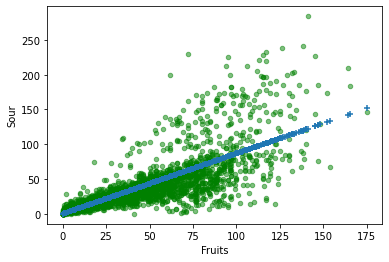

In [13]:
## Evaluating the trend line:
df.plot.scatter(x='Fruits',y='Sour',marker='o',c="g",alpha=0.5)
plt.scatter(x=df['Fruits'],y=reg.predict(df['Fruits'].values.reshape(-1,1)),marker='+',label='trend_line')

Let's see if adding 'Astringency' can help predict level of 'Sour' (sourness):

In [14]:
reg_multiple = LinearRegression()

multiple_columns = ['Fruits','Astringency']

reg_multiple.fit(X_train[multiple_columns], y_train)
print("regression parameters:", reg.coef_,reg.intercept_)

regression parameters: [0.86880203] -0.142996627279544


In [15]:
## Check r-squared for this model:
train_rmse = mean_squared_error(reg_multiple.predict(X_train[multiple_columns]),y_train,squared=False)
test_rmse = mean_squared_error(reg_multiple.predict(X_test[multiple_columns]),y_test,squared=False)


train_r2 = r2_score(reg_multiple.predict(X_train[multiple_columns]),y_train)
test_r2 = r2_score(reg_multiple.predict(X_test[multiple_columns]),y_test)
print('rmse train:',train_rmse,'rmse test:', test_rmse)
print("r2 train:", train_r2,'r2 test:', test_r2)

rmse train: 19.393115002418288 rmse test: 17.88770762454073
r2 train: 0.6014846979040045 r2 test: 0.6571811036469168


### Hey, 60-65%, that's an improvement from a negative R-squared.

Let's see if any of the other variables with less hints of correlation can improve the model:

In [16]:
## Can adding metric for sweetness improve the model?:
reg_multiple = LinearRegression()

multiple_columns = ['Fruits','Astringency','Sweet']

reg_multiple.fit(X_train[multiple_columns], y_train)
print("regression parameters:", reg.coef_,reg.intercept_)

regression parameters: [0.86880203] -0.142996627279544


In [17]:
## Check r-squared with sweetness added:
train_rmse = mean_squared_error(reg_multiple.predict(X_train[multiple_columns]),y_train,squared=False)
test_rmse = mean_squared_error(reg_multiple.predict(X_test[multiple_columns]),y_test,squared=False)


train_r2 = r2_score(reg_multiple.predict(X_train[multiple_columns]),y_train)
test_r2 = r2_score(reg_multiple.predict(X_test[multiple_columns]),y_test)
print('rmse train:',train_rmse,'rmse test:', test_rmse)
print("r2 train:", train_r2,'r2 test:', test_r2)

rmse train: 19.22033019599842 rmse test: 17.791411883218753
r2 train: 0.6113022158064989 r2 test: 0.6617225875257344


Not much of an imrovement there. Let's try adding 'Malty', Astringency', and 'review_appearance':

In [18]:
#Adding 'Astringency', 'Malty' and 'review_appearance':
reg_multiple = LinearRegression()

multiple_columns = ['Fruits','Astringency','Malty','review_appearance','Sweet']

reg_multiple.fit(X_train[multiple_columns], y_train)
print("regression parameters:", reg.coef_,reg.intercept_)

regression parameters: [0.86880203] -0.142996627279544


In [19]:
train_rmse = mean_squared_error(reg_multiple.predict(X_train[multiple_columns]),y_train,squared=False)
test_rmse = mean_squared_error(reg_multiple.predict(X_test[multiple_columns]),y_test,squared=False)


train_r2 = r2_score(reg_multiple.predict(X_train[multiple_columns]),y_train)
test_r2 = r2_score(reg_multiple.predict(X_test[multiple_columns]),y_test)
print('rmse train:',train_rmse,'rmse test:', test_rmse)
print("r2 train:", train_r2,'r2 test:', test_r2)

rmse train: 18.456619232390146 rmse test: 17.163116228854356
r2 train: 0.6521105993052694 r2 test: 0.6929781616244106


# This seems about the most accurate prediction model I will get ( ~ 65-69% correlation) for 'Sour' with the LinearRegression without changing variables, or by using other tuning.